In [3]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])

x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
#print(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

# Build the model

model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]
Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                50        
_________________________________________________________________
fc2 (Dense)                  (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200


C:\Users\MrBinh\.conda\envs\Binh_python7\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


24/24 - 0s - loss: 1.3142 - accuracy: 0.3417
Epoch 2/200
24/24 - 0s - loss: 1.1938 - accuracy: 0.3333
Epoch 3/200
24/24 - 0s - loss: 1.1526 - accuracy: 0.3833
Epoch 4/200
24/24 - 0s - loss: 1.1298 - accuracy: 0.4833
Epoch 5/200
24/24 - 0s - loss: 1.1151 - accuracy: 0.4750
Epoch 6/200
24/24 - 0s - loss: 1.1011 - accuracy: 0.4833
Epoch 7/200
24/24 - 0s - loss: 1.0868 - accuracy: 0.4083
Epoch 8/200
24/24 - 0s - loss: 1.0736 - accuracy: 0.4417
Epoch 9/200
24/24 - 0s - loss: 1.0548 - accuracy: 0.4083
Epoch 10/200
24/24 - 0s - loss: 1.0380 - accuracy: 0.4500
Epoch 11/200
24/24 - 0s - loss: 1.0175 - accuracy: 0.5583
Epoch 12/200
24/24 - 0s - loss: 0.9936 - accuracy: 0.5833
Epoch 13/200
24/24 - 0s - loss: 0.9634 - accuracy: 0.7333
Epoch 14/200
24/24 - 0s - loss: 0.9313 - accuracy: 0.9000
Epoch 15/200
24/24 - 0s - loss: 0.9005 - accuracy: 0.8333
Epoch 16/200
24/24 - 0s - loss: 0.8554 - accuracy: 0.8917
Epoch 17/200
24/24 - 0s - loss: 0.8084 - accuracy: 0.9083
Epoch 18/200
24/24 - 0s - loss: 0.7

Epoch 142/200
24/24 - 0s - loss: 0.0816 - accuracy: 0.9750
Epoch 143/200
24/24 - 0s - loss: 0.0812 - accuracy: 0.9750
Epoch 144/200
24/24 - 0s - loss: 0.0798 - accuracy: 0.9667
Epoch 145/200
24/24 - 0s - loss: 0.0797 - accuracy: 0.9667
Epoch 146/200
24/24 - 0s - loss: 0.0806 - accuracy: 0.9667
Epoch 147/200
24/24 - 0s - loss: 0.0813 - accuracy: 0.9750
Epoch 148/200
24/24 - 0s - loss: 0.0875 - accuracy: 0.9667
Epoch 149/200
24/24 - 0s - loss: 0.0907 - accuracy: 0.9667
Epoch 150/200
24/24 - 0s - loss: 0.0776 - accuracy: 0.9667
Epoch 151/200
24/24 - 0s - loss: 0.0790 - accuracy: 0.9750
Epoch 152/200
24/24 - 0s - loss: 0.0781 - accuracy: 0.9750
Epoch 153/200
24/24 - 0s - loss: 0.0799 - accuracy: 0.9667
Epoch 154/200
24/24 - 0s - loss: 0.0793 - accuracy: 0.9750
Epoch 155/200
24/24 - 0s - loss: 0.0816 - accuracy: 0.9750
Epoch 156/200
24/24 - 0s - loss: 0.0800 - accuracy: 0.9667
Epoch 157/200
24/24 - 0s - loss: 0.0762 - accuracy: 0.9750
Epoch 158/200
24/24 - 0s - loss: 0.0775 - accuracy: 0.97

In [32]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

iris_data = load_iris() # load the iris dataset

x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
#print(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((120, 4), (120, 3), (30, 4), (30, 3))

In [4]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import pandas as pd

In [5]:
save_folder = 'data_nan_mean'
X_train = pd.read_csv('../data/' + save_folder + '/X_train.csv').values
y_train = pd.read_csv('../data/' + save_folder + '/y_train.csv').values
X_test = pd.read_csv('../data/' + save_folder + '/X_test.csv').values
y_test = pd.read_csv('../data/' + save_folder + '/y_test.csv').values

y_train = np.squeeze(y_train)
n_values = np.max(y_train) + 1
y_train = np.eye(n_values)[y_train]

y_test = np.squeeze(y_test)
n_values = np.max(y_test) + 1
y_test = np.eye(n_values)[y_test]

In [59]:
model = Sequential()

model.add(Dense(16, input_shape=(9,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, verbose=2, batch_size=16, epochs=300)
results = model.evaluate(X_test, y_test)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 3)                 51        
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
17/17 - 0s - loss: 256.6971 - accuracy: 0.3676
Epoch 2/300
17/17 - 0s - loss: 139.9102 - accuracy: 0.3346
Epoch 3/300
17/17 - 0s - loss: 52.0885 - accuracy: 0.2831
Epoch 4/300
17/17 - 0s - loss: 12.2342 - accuracy: 0.2904
Epoch 5/300
17/17 - 0s - loss: 9.0095 - accuracy: 0.3235
Epoch 6/300
17/17 - 0s - loss: 3.7384 - accuracy: 0.3162
Epoch 7/300
17/17 - 0s - loss: 3

Epoch 129/300
17/17 - 0s - loss: 0.9897 - accuracy: 0.6507
Epoch 130/300
17/17 - 0s - loss: 0.3436 - accuracy: 0.8603
Epoch 131/300
17/17 - 0s - loss: 0.5286 - accuracy: 0.8051
Epoch 132/300
17/17 - 0s - loss: 0.7077 - accuracy: 0.7831
Epoch 133/300
17/17 - 0s - loss: 0.5200 - accuracy: 0.7904
Epoch 134/300
17/17 - 0s - loss: 0.8316 - accuracy: 0.7022
Epoch 135/300
17/17 - 0s - loss: 0.2584 - accuracy: 0.9191
Epoch 136/300
17/17 - 0s - loss: 0.5906 - accuracy: 0.7610
Epoch 137/300
17/17 - 0s - loss: 0.4063 - accuracy: 0.8162
Epoch 138/300
17/17 - 0s - loss: 0.1824 - accuracy: 0.9522
Epoch 139/300
17/17 - 0s - loss: 0.5556 - accuracy: 0.7721
Epoch 140/300
17/17 - 0s - loss: 0.4635 - accuracy: 0.8088
Epoch 141/300
17/17 - 0s - loss: 0.4697 - accuracy: 0.8125
Epoch 142/300
17/17 - 0s - loss: 0.4488 - accuracy: 0.8456
Epoch 143/300
17/17 - 0s - loss: 0.2365 - accuracy: 0.9265
Epoch 144/300
17/17 - 0s - loss: 0.3507 - accuracy: 0.8382
Epoch 145/300
17/17 - 0s - loss: 0.5227 - accuracy: 0.77

Epoch 268/300
17/17 - 0s - loss: 0.2521 - accuracy: 0.8971
Epoch 269/300
17/17 - 0s - loss: 0.2609 - accuracy: 0.8860
Epoch 270/300
17/17 - 0s - loss: 0.2746 - accuracy: 0.8897
Epoch 271/300
17/17 - 0s - loss: 0.5955 - accuracy: 0.7537
Epoch 272/300
17/17 - 0s - loss: 0.1497 - accuracy: 0.9522
Epoch 273/300
17/17 - 0s - loss: 0.1455 - accuracy: 0.9412
Epoch 274/300
17/17 - 0s - loss: 0.2239 - accuracy: 0.8934
Epoch 275/300
17/17 - 0s - loss: 0.4649 - accuracy: 0.8272
Epoch 276/300
17/17 - 0s - loss: 0.2794 - accuracy: 0.8971
Epoch 277/300
17/17 - 0s - loss: 0.2718 - accuracy: 0.8860
Epoch 278/300
17/17 - 0s - loss: 0.1598 - accuracy: 0.9338
Epoch 279/300
17/17 - 0s - loss: 0.1017 - accuracy: 0.9669
Epoch 280/300
17/17 - 0s - loss: 0.1211 - accuracy: 0.9485
Epoch 281/300
17/17 - 0s - loss: 0.1451 - accuracy: 0.9485
Epoch 282/300
17/17 - 0s - loss: 0.3058 - accuracy: 0.8860
Epoch 283/300
17/17 - 0s - loss: 0.1825 - accuracy: 0.9191
Epoch 284/300
17/17 - 0s - loss: 0.6308 - accuracy: 0.79

In [7]:
model = Sequential()

model.add(Dense(16, input_shape=(9,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, verbose=2, batch_size=16, epochs=300)
results = model.evaluate(X_test, y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 3)                 51        
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
17/17 - 0s - loss: 644.4917 - accuracy: 0.4412
Epoch 2/300
17/17 - 0s - loss: 269.5877 - accuracy: 0.3088
Epoch 3/300
17/17 - 0s - loss: 54.8418 - accuracy: 0.3125
Epoch 4/300
17/17 - 0s - loss: 13.1361 - accuracy: 0.3272
Epoch 5/300
17/17 - 0s - loss: 7.1056 - accuracy: 0.1912
Epoch 6/300
17/17 - 0s - loss: 5.8651 - accuracy: 0.1875
Epoch 7/300
17/17 - 0s - loss: 5.

Epoch 129/300
17/17 - 0s - loss: 0.3282 - accuracy: 0.8750
Epoch 130/300
17/17 - 0s - loss: 0.4116 - accuracy: 0.8346
Epoch 131/300
17/17 - 0s - loss: 0.5023 - accuracy: 0.7463
Epoch 132/300
17/17 - 0s - loss: 0.3599 - accuracy: 0.8640
Epoch 133/300
17/17 - 0s - loss: 0.2703 - accuracy: 0.9118
Epoch 134/300
17/17 - 0s - loss: 0.3934 - accuracy: 0.8125
Epoch 135/300
17/17 - 0s - loss: 0.4243 - accuracy: 0.8382
Epoch 136/300
17/17 - 0s - loss: 0.2678 - accuracy: 0.9044
Epoch 137/300
17/17 - 0s - loss: 0.4587 - accuracy: 0.8199
Epoch 138/300
17/17 - 0s - loss: 0.5515 - accuracy: 0.7537
Epoch 139/300
17/17 - 0s - loss: 0.5243 - accuracy: 0.7831
Epoch 140/300
17/17 - 0s - loss: 0.3433 - accuracy: 0.8456
Epoch 141/300
17/17 - 0s - loss: 0.3057 - accuracy: 0.8824
Epoch 142/300
17/17 - 0s - loss: 0.3681 - accuracy: 0.8382
Epoch 143/300
17/17 - 0s - loss: 0.3247 - accuracy: 0.8750
Epoch 144/300
17/17 - 0s - loss: 0.3085 - accuracy: 0.8676
Epoch 145/300
17/17 - 0s - loss: 0.3300 - accuracy: 0.87

Epoch 268/300
17/17 - 0s - loss: 0.1353 - accuracy: 0.9559
Epoch 269/300
17/17 - 0s - loss: 0.3473 - accuracy: 0.8272
Epoch 270/300
17/17 - 0s - loss: 0.2341 - accuracy: 0.8971
Epoch 271/300
17/17 - 0s - loss: 0.8370 - accuracy: 0.7500
Epoch 272/300
17/17 - 0s - loss: 0.5329 - accuracy: 0.7978
Epoch 273/300
17/17 - 0s - loss: 0.2302 - accuracy: 0.8934
Epoch 274/300
17/17 - 0s - loss: 0.1752 - accuracy: 0.9412
Epoch 275/300
17/17 - 0s - loss: 0.1771 - accuracy: 0.9338
Epoch 276/300
17/17 - 0s - loss: 0.3488 - accuracy: 0.8419
Epoch 277/300
17/17 - 0s - loss: 0.1907 - accuracy: 0.9228
Epoch 278/300
17/17 - 0s - loss: 0.2767 - accuracy: 0.8897
Epoch 279/300
17/17 - 0s - loss: 1.1153 - accuracy: 0.6801
Epoch 280/300
17/17 - 0s - loss: 0.3627 - accuracy: 0.8456
Epoch 281/300
17/17 - 0s - loss: 0.1951 - accuracy: 0.9375
Epoch 282/300
17/17 - 0s - loss: 0.1615 - accuracy: 0.9301
Epoch 283/300
17/17 - 0s - loss: 0.4275 - accuracy: 0.8162
Epoch 284/300
17/17 - 0s - loss: 0.1590 - accuracy: 0.94

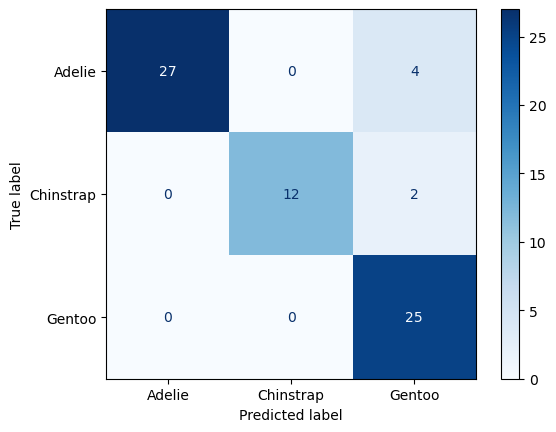

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('default')

y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)
y_test_label = np.argmax(y_test, axis=1)

labels = ["Adelie", "Chinstrap", "Gentoo"]

cm = confusion_matrix(y_test_label, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.savefig('../pics/Neural_net/confusion_matrix')
plt.savefig('../pics/Neural_net/confusion_matrix.pdf')
plt.show()

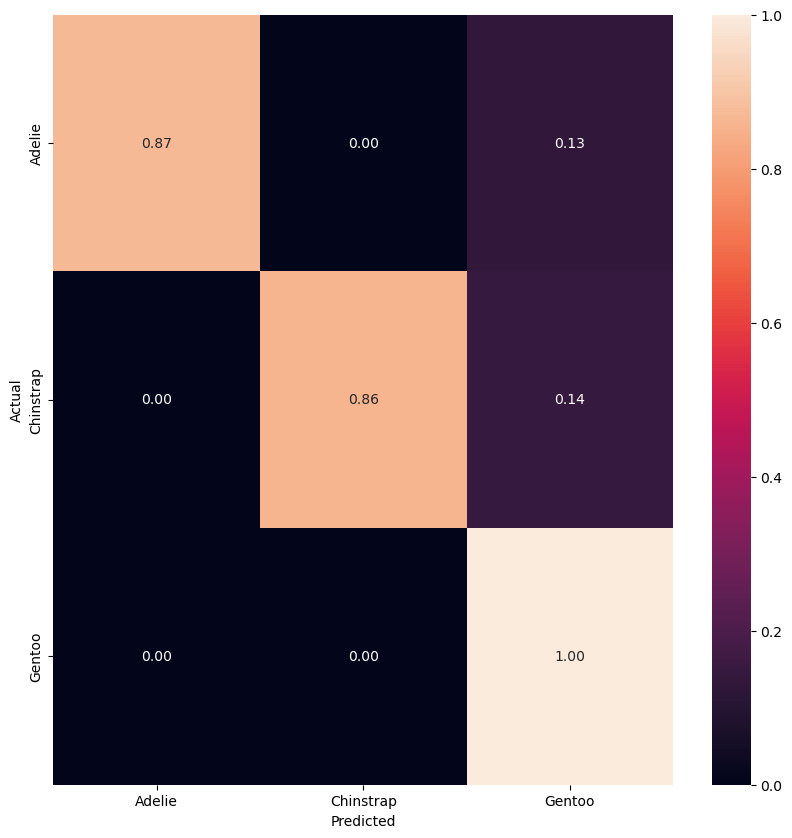

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_label, y_predict)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('../pics/Neural_net/confusion_matrix_normalization')
plt.savefig('../pics/Neural_net/confusion_matrix_normalization.pdf')
plt.show(block=False)

In [36]:
model = Sequential()

model.add(Dense(16, input_shape=(9,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, verbose=2, batch_size=16, epochs=800)
results = model.evaluate(X_test, y_test)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                160       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 3)                 51        
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/800
17/17 - 0s - loss: 871.9077 - accuracy: 0.1985
Epoch 2/800
17/17 - 0s - loss: 317.6213 - accuracy: 0.4007
Epoch 3/800
17/17 - 0s - loss: 77.6608 - accuracy: 0.3235
Epoch 4/800
17/17 - 0s - loss: 30.5676 - accuracy: 0.3971
Epoch 5/800
17/17 - 0s - loss: 13.6114 - accuracy: 0.3125
Epoch 6/800
17/17 - 0s - loss: 9.3783 - accuracy: 0.2022
Epoch 7/800
17/17 - 0s - loss: 8

Epoch 129/800
17/17 - 0s - loss: 0.6118 - accuracy: 0.7169
Epoch 130/800
17/17 - 0s - loss: 0.8892 - accuracy: 0.7169
Epoch 131/800
17/17 - 0s - loss: 0.9922 - accuracy: 0.7022
Epoch 132/800
17/17 - 0s - loss: 0.4789 - accuracy: 0.7868
Epoch 133/800
17/17 - 0s - loss: 0.4746 - accuracy: 0.8272
Epoch 134/800
17/17 - 0s - loss: 1.4629 - accuracy: 0.5956
Epoch 135/800
17/17 - 0s - loss: 0.6393 - accuracy: 0.7904
Epoch 136/800
17/17 - 0s - loss: 0.3668 - accuracy: 0.8199
Epoch 137/800
17/17 - 0s - loss: 0.3291 - accuracy: 0.8640
Epoch 138/800
17/17 - 0s - loss: 0.7908 - accuracy: 0.7463
Epoch 139/800
17/17 - 0s - loss: 0.4792 - accuracy: 0.7831
Epoch 140/800
17/17 - 0s - loss: 0.3723 - accuracy: 0.8493
Epoch 141/800
17/17 - 0s - loss: 0.9675 - accuracy: 0.7243
Epoch 142/800
17/17 - 0s - loss: 1.5365 - accuracy: 0.5993
Epoch 143/800
17/17 - 0s - loss: 0.9703 - accuracy: 0.7463
Epoch 144/800
17/17 - 0s - loss: 0.8200 - accuracy: 0.7022
Epoch 145/800
17/17 - 0s - loss: 1.5269 - accuracy: 0.68

Epoch 268/800
17/17 - 0s - loss: 1.8834 - accuracy: 0.6544
Epoch 269/800
17/17 - 0s - loss: 1.3421 - accuracy: 0.7206
Epoch 270/800
17/17 - 0s - loss: 1.4634 - accuracy: 0.6728
Epoch 271/800
17/17 - 0s - loss: 1.2818 - accuracy: 0.6618
Epoch 272/800
17/17 - 0s - loss: 1.0554 - accuracy: 0.7243
Epoch 273/800
17/17 - 0s - loss: 0.4393 - accuracy: 0.8382
Epoch 274/800
17/17 - 0s - loss: 0.6318 - accuracy: 0.7721
Epoch 275/800
17/17 - 0s - loss: 0.3367 - accuracy: 0.8529
Epoch 276/800
17/17 - 0s - loss: 1.0099 - accuracy: 0.7537
Epoch 277/800
17/17 - 0s - loss: 0.5926 - accuracy: 0.8051
Epoch 278/800
17/17 - 0s - loss: 0.2149 - accuracy: 0.9044
Epoch 279/800
17/17 - 0s - loss: 0.2698 - accuracy: 0.8713
Epoch 280/800
17/17 - 0s - loss: 0.3974 - accuracy: 0.8456
Epoch 281/800
17/17 - 0s - loss: 1.0318 - accuracy: 0.7463
Epoch 282/800
17/17 - 0s - loss: 0.7131 - accuracy: 0.7721
Epoch 283/800
17/17 - 0s - loss: 1.3344 - accuracy: 0.6728
Epoch 284/800
17/17 - 0s - loss: 0.7440 - accuracy: 0.80

Epoch 407/800
17/17 - 0s - loss: 0.4677 - accuracy: 0.8456
Epoch 408/800
17/17 - 0s - loss: 0.7399 - accuracy: 0.7904
Epoch 409/800
17/17 - 0s - loss: 0.8701 - accuracy: 0.7353
Epoch 410/800
17/17 - 0s - loss: 0.1788 - accuracy: 0.9265
Epoch 411/800
17/17 - 0s - loss: 0.2238 - accuracy: 0.9044
Epoch 412/800
17/17 - 0s - loss: 0.1755 - accuracy: 0.9228
Epoch 413/800
17/17 - 0s - loss: 0.0986 - accuracy: 0.9596
Epoch 414/800
17/17 - 0s - loss: 1.3475 - accuracy: 0.7390
Epoch 415/800
17/17 - 0s - loss: 3.8535 - accuracy: 0.5735
Epoch 416/800
17/17 - 0s - loss: 0.6506 - accuracy: 0.8051
Epoch 417/800
17/17 - 0s - loss: 0.2493 - accuracy: 0.9081
Epoch 418/800
17/17 - 0s - loss: 0.3613 - accuracy: 0.8750
Epoch 419/800
17/17 - 0s - loss: 0.4649 - accuracy: 0.8640
Epoch 420/800
17/17 - 0s - loss: 0.5314 - accuracy: 0.8529
Epoch 421/800
17/17 - 0s - loss: 1.1292 - accuracy: 0.7426
Epoch 422/800
17/17 - 0s - loss: 1.1843 - accuracy: 0.7243
Epoch 423/800
17/17 - 0s - loss: 1.9646 - accuracy: 0.66

Epoch 546/800
17/17 - 0s - loss: 0.0916 - accuracy: 0.9596
Epoch 547/800
17/17 - 0s - loss: 0.1319 - accuracy: 0.9559
Epoch 548/800
17/17 - 0s - loss: 0.1360 - accuracy: 0.9485
Epoch 549/800
17/17 - 0s - loss: 0.1704 - accuracy: 0.9338
Epoch 550/800
17/17 - 0s - loss: 0.0866 - accuracy: 0.9632
Epoch 551/800
17/17 - 0s - loss: 0.0882 - accuracy: 0.9632
Epoch 552/800
17/17 - 0s - loss: 0.2904 - accuracy: 0.8971
Epoch 553/800
17/17 - 0s - loss: 0.1288 - accuracy: 0.9375
Epoch 554/800
17/17 - 0s - loss: 0.2549 - accuracy: 0.9007
Epoch 555/800
17/17 - 0s - loss: 0.1824 - accuracy: 0.9412
Epoch 556/800
17/17 - 0s - loss: 0.2307 - accuracy: 0.9118
Epoch 557/800
17/17 - 0s - loss: 0.0877 - accuracy: 0.9669
Epoch 558/800
17/17 - 0s - loss: 0.0550 - accuracy: 0.9779
Epoch 559/800
17/17 - 0s - loss: 0.0774 - accuracy: 0.9816
Epoch 560/800
17/17 - 0s - loss: 1.1345 - accuracy: 0.8015
Epoch 561/800
17/17 - 0s - loss: 0.9644 - accuracy: 0.8199
Epoch 562/800
17/17 - 0s - loss: 0.3400 - accuracy: 0.88

Epoch 685/800
17/17 - 0s - loss: 1.2802 - accuracy: 0.7721
Epoch 686/800
17/17 - 0s - loss: 0.2737 - accuracy: 0.9154
Epoch 687/800
17/17 - 0s - loss: 0.6616 - accuracy: 0.8272
Epoch 688/800
17/17 - 0s - loss: 0.5897 - accuracy: 0.8199
Epoch 689/800
17/17 - 0s - loss: 0.3617 - accuracy: 0.8713
Epoch 690/800
17/17 - 0s - loss: 0.1351 - accuracy: 0.9559
Epoch 691/800
17/17 - 0s - loss: 0.2792 - accuracy: 0.9301
Epoch 692/800
17/17 - 0s - loss: 0.3109 - accuracy: 0.9044
Epoch 693/800
17/17 - 0s - loss: 0.3577 - accuracy: 0.8860
Epoch 694/800
17/17 - 0s - loss: 0.1391 - accuracy: 0.9412
Epoch 695/800
17/17 - 0s - loss: 0.1678 - accuracy: 0.9375
Epoch 696/800
17/17 - 0s - loss: 0.2522 - accuracy: 0.9228
Epoch 697/800
17/17 - 0s - loss: 0.0519 - accuracy: 0.9743
Epoch 698/800
17/17 - 0s - loss: 0.1046 - accuracy: 0.9596
Epoch 699/800
17/17 - 0s - loss: 0.2324 - accuracy: 0.9338
Epoch 700/800
17/17 - 0s - loss: 0.1227 - accuracy: 0.9485
Epoch 701/800
17/17 - 0s - loss: 0.1060 - accuracy: 0.96

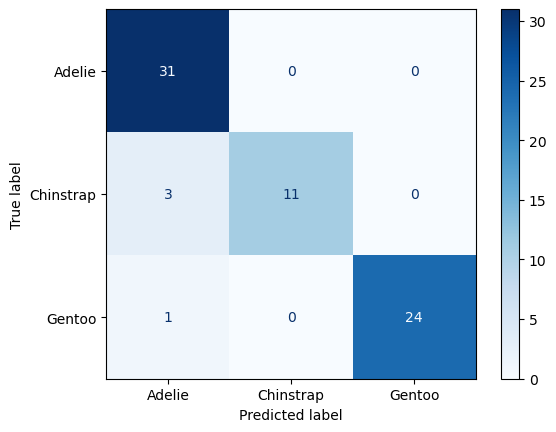

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('default')

y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)
y_test_label = np.argmax(y_test, axis=1)

labels = ["Adelie", "Chinstrap", "Gentoo"]

cm = confusion_matrix(y_test_label, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [38]:
model = Sequential()

model.add(Dense(16, input_shape=(9,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, verbose=2, batch_size=16, epochs=1200)
results = model.evaluate(X_test, y_test)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 3)                 51        
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1200
17/17 - 0s - loss: 477.9970 - accuracy: 0.1985
Epoch 2/1200
17/17 - 0s - loss: 182.1304 - accuracy: 0.2206
Epoch 3/1200
17/17 - 0s - loss: 44.2468 - accuracy: 0.3713
Epoch 4/1200
17/17 - 0s - loss: 12.9236 - accuracy: 0.4301
Epoch 5/1200
17/17 - 0s - loss: 3.7361 - accuracy: 0.4412
Epoch 6/1200
17/17 - 0s - loss: 2.1605 - accuracy: 0.3750
Epoch 7/1200
17/17 - 0s - l

Epoch 127/1200
17/17 - 0s - loss: 0.7025 - accuracy: 0.6728
Epoch 128/1200
17/17 - 0s - loss: 0.6039 - accuracy: 0.7096
Epoch 129/1200
17/17 - 0s - loss: 0.8222 - accuracy: 0.6654
Epoch 130/1200
17/17 - 0s - loss: 0.9767 - accuracy: 0.6213
Epoch 131/1200
17/17 - 0s - loss: 1.7898 - accuracy: 0.5809
Epoch 132/1200
17/17 - 0s - loss: 1.3320 - accuracy: 0.5919
Epoch 133/1200
17/17 - 0s - loss: 0.7707 - accuracy: 0.6728
Epoch 134/1200
17/17 - 0s - loss: 0.8251 - accuracy: 0.6765
Epoch 135/1200
17/17 - 0s - loss: 0.6945 - accuracy: 0.7132
Epoch 136/1200
17/17 - 0s - loss: 0.6959 - accuracy: 0.6801
Epoch 137/1200
17/17 - 0s - loss: 0.8605 - accuracy: 0.6324
Epoch 138/1200
17/17 - 0s - loss: 0.7827 - accuracy: 0.6654
Epoch 139/1200
17/17 - 0s - loss: 0.8935 - accuracy: 0.6324
Epoch 140/1200
17/17 - 0s - loss: 1.0372 - accuracy: 0.6213
Epoch 141/1200
17/17 - 0s - loss: 0.8629 - accuracy: 0.6360
Epoch 142/1200
17/17 - 0s - loss: 0.8197 - accuracy: 0.6360
Epoch 143/1200
17/17 - 0s - loss: 1.0179

Epoch 264/1200
17/17 - 0s - loss: 0.3294 - accuracy: 0.8860
Epoch 265/1200
17/17 - 0s - loss: 0.3578 - accuracy: 0.8456
Epoch 266/1200
17/17 - 0s - loss: 0.3220 - accuracy: 0.8934
Epoch 267/1200
17/17 - 0s - loss: 0.4456 - accuracy: 0.8051
Epoch 268/1200
17/17 - 0s - loss: 0.4391 - accuracy: 0.8199
Epoch 269/1200
17/17 - 0s - loss: 0.3978 - accuracy: 0.8272
Epoch 270/1200
17/17 - 0s - loss: 0.4560 - accuracy: 0.8088
Epoch 271/1200
17/17 - 0s - loss: 0.3447 - accuracy: 0.8860
Epoch 272/1200
17/17 - 0s - loss: 0.4146 - accuracy: 0.8309
Epoch 273/1200
17/17 - 0s - loss: 0.3313 - accuracy: 0.8934
Epoch 274/1200
17/17 - 0s - loss: 0.3022 - accuracy: 0.9007
Epoch 275/1200
17/17 - 0s - loss: 0.3479 - accuracy: 0.8456
Epoch 276/1200
17/17 - 0s - loss: 0.5239 - accuracy: 0.7463
Epoch 277/1200
17/17 - 0s - loss: 0.3029 - accuracy: 0.8971
Epoch 278/1200
17/17 - 0s - loss: 0.3403 - accuracy: 0.8603
Epoch 279/1200
17/17 - 0s - loss: 0.3834 - accuracy: 0.8456
Epoch 280/1200
17/17 - 0s - loss: 0.2917

Epoch 401/1200
17/17 - 0s - loss: 0.1753 - accuracy: 0.9449
Epoch 402/1200
17/17 - 0s - loss: 0.1683 - accuracy: 0.9449
Epoch 403/1200
17/17 - 0s - loss: 0.1957 - accuracy: 0.9412
Epoch 404/1200
17/17 - 0s - loss: 0.2390 - accuracy: 0.9228
Epoch 405/1200
17/17 - 0s - loss: 0.2450 - accuracy: 0.9118
Epoch 406/1200
17/17 - 0s - loss: 0.3991 - accuracy: 0.8419
Epoch 407/1200
17/17 - 0s - loss: 0.2215 - accuracy: 0.9228
Epoch 408/1200
17/17 - 0s - loss: 0.3338 - accuracy: 0.8713
Epoch 409/1200
17/17 - 0s - loss: 0.6452 - accuracy: 0.7941
Epoch 410/1200
17/17 - 0s - loss: 0.2812 - accuracy: 0.8787
Epoch 411/1200
17/17 - 0s - loss: 0.2836 - accuracy: 0.8860
Epoch 412/1200
17/17 - 0s - loss: 0.3043 - accuracy: 0.8934
Epoch 413/1200
17/17 - 0s - loss: 0.2863 - accuracy: 0.9007
Epoch 414/1200
17/17 - 0s - loss: 0.3776 - accuracy: 0.8860
Epoch 415/1200
17/17 - 0s - loss: 0.3292 - accuracy: 0.8750
Epoch 416/1200
17/17 - 0s - loss: 0.2009 - accuracy: 0.9228
Epoch 417/1200
17/17 - 0s - loss: 0.1714

Epoch 538/1200
17/17 - 0s - loss: 0.3766 - accuracy: 0.8382
Epoch 539/1200
17/17 - 0s - loss: 0.1951 - accuracy: 0.9191
Epoch 540/1200
17/17 - 0s - loss: 0.3005 - accuracy: 0.8787
Epoch 541/1200
17/17 - 0s - loss: 0.2951 - accuracy: 0.8676
Epoch 542/1200
17/17 - 0s - loss: 0.2281 - accuracy: 0.9044
Epoch 543/1200
17/17 - 0s - loss: 0.1886 - accuracy: 0.9228
Epoch 544/1200
17/17 - 0s - loss: 0.1080 - accuracy: 0.9706
Epoch 545/1200
17/17 - 0s - loss: 0.1092 - accuracy: 0.9669
Epoch 546/1200
17/17 - 0s - loss: 0.2880 - accuracy: 0.8971
Epoch 547/1200
17/17 - 0s - loss: 0.2330 - accuracy: 0.8971
Epoch 548/1200
17/17 - 0s - loss: 0.3207 - accuracy: 0.8713
Epoch 549/1200
17/17 - 0s - loss: 0.3079 - accuracy: 0.9007
Epoch 550/1200
17/17 - 0s - loss: 0.1134 - accuracy: 0.9559
Epoch 551/1200
17/17 - 0s - loss: 0.1321 - accuracy: 0.9412
Epoch 552/1200
17/17 - 0s - loss: 0.1110 - accuracy: 0.9669
Epoch 553/1200
17/17 - 0s - loss: 0.1389 - accuracy: 0.9596
Epoch 554/1200
17/17 - 0s - loss: 0.1012

Epoch 675/1200
17/17 - 0s - loss: 0.2140 - accuracy: 0.8971
Epoch 676/1200
17/17 - 0s - loss: 0.1541 - accuracy: 0.9449
Epoch 677/1200
17/17 - 0s - loss: 0.0792 - accuracy: 0.9706
Epoch 678/1200
17/17 - 0s - loss: 0.0907 - accuracy: 0.9669
Epoch 679/1200
17/17 - 0s - loss: 0.0961 - accuracy: 0.9669
Epoch 680/1200
17/17 - 0s - loss: 0.1215 - accuracy: 0.9632
Epoch 681/1200
17/17 - 0s - loss: 0.0831 - accuracy: 0.9779
Epoch 682/1200
17/17 - 0s - loss: 0.0782 - accuracy: 0.9706
Epoch 683/1200
17/17 - 0s - loss: 0.0873 - accuracy: 0.9669
Epoch 684/1200
17/17 - 0s - loss: 0.0605 - accuracy: 0.9816
Epoch 685/1200
17/17 - 0s - loss: 0.1047 - accuracy: 0.9596
Epoch 686/1200
17/17 - 0s - loss: 0.0669 - accuracy: 0.9779
Epoch 687/1200
17/17 - 0s - loss: 0.1487 - accuracy: 0.9522
Epoch 688/1200
17/17 - 0s - loss: 0.7595 - accuracy: 0.7831
Epoch 689/1200
17/17 - 0s - loss: 0.3068 - accuracy: 0.8750
Epoch 690/1200
17/17 - 0s - loss: 0.1590 - accuracy: 0.9412
Epoch 691/1200
17/17 - 0s - loss: 0.1777

Epoch 812/1200
17/17 - 0s - loss: 0.1394 - accuracy: 0.9301
Epoch 813/1200
17/17 - 0s - loss: 0.1323 - accuracy: 0.9338
Epoch 814/1200
17/17 - 0s - loss: 0.2095 - accuracy: 0.9044
Epoch 815/1200
17/17 - 0s - loss: 0.2014 - accuracy: 0.9301
Epoch 816/1200
17/17 - 0s - loss: 0.0813 - accuracy: 0.9669
Epoch 817/1200
17/17 - 0s - loss: 0.1362 - accuracy: 0.9412
Epoch 818/1200
17/17 - 0s - loss: 0.1386 - accuracy: 0.9522
Epoch 819/1200
17/17 - 0s - loss: 0.0613 - accuracy: 0.9779
Epoch 820/1200
17/17 - 0s - loss: 0.1087 - accuracy: 0.9632
Epoch 821/1200
17/17 - 0s - loss: 0.1312 - accuracy: 0.9375
Epoch 822/1200
17/17 - 0s - loss: 0.8701 - accuracy: 0.7757
Epoch 823/1200
17/17 - 0s - loss: 0.5208 - accuracy: 0.8456
Epoch 824/1200
17/17 - 0s - loss: 0.0820 - accuracy: 0.9669
Epoch 825/1200
17/17 - 0s - loss: 0.0699 - accuracy: 0.9706
Epoch 826/1200
17/17 - 0s - loss: 0.0875 - accuracy: 0.9632
Epoch 827/1200
17/17 - 0s - loss: 0.0774 - accuracy: 0.9743
Epoch 828/1200
17/17 - 0s - loss: 0.1717

Epoch 949/1200
17/17 - 0s - loss: 0.0371 - accuracy: 0.9853
Epoch 950/1200
17/17 - 0s - loss: 0.0778 - accuracy: 0.9743
Epoch 951/1200
17/17 - 0s - loss: 0.0658 - accuracy: 0.9816
Epoch 952/1200
17/17 - 0s - loss: 0.0567 - accuracy: 0.9816
Epoch 953/1200
17/17 - 0s - loss: 0.0630 - accuracy: 0.9816
Epoch 954/1200
17/17 - 0s - loss: 0.0618 - accuracy: 0.9779
Epoch 955/1200
17/17 - 0s - loss: 0.1049 - accuracy: 0.9485
Epoch 956/1200
17/17 - 0s - loss: 0.1145 - accuracy: 0.9522
Epoch 957/1200
17/17 - 0s - loss: 0.1145 - accuracy: 0.9485
Epoch 958/1200
17/17 - 0s - loss: 0.0887 - accuracy: 0.9669
Epoch 959/1200
17/17 - 0s - loss: 0.0526 - accuracy: 0.9706
Epoch 960/1200
17/17 - 0s - loss: 0.0661 - accuracy: 0.9816
Epoch 961/1200
17/17 - 0s - loss: 0.0561 - accuracy: 0.9779
Epoch 962/1200
17/17 - 0s - loss: 0.0611 - accuracy: 0.9706
Epoch 963/1200
17/17 - 0s - loss: 0.0450 - accuracy: 0.9853
Epoch 964/1200
17/17 - 0s - loss: 0.0478 - accuracy: 0.9816
Epoch 965/1200
17/17 - 0s - loss: 0.0554

Epoch 1085/1200
17/17 - 0s - loss: 0.0177 - accuracy: 0.9963
Epoch 1086/1200
17/17 - 0s - loss: 0.0971 - accuracy: 0.9706
Epoch 1087/1200
17/17 - 0s - loss: 0.6595 - accuracy: 0.8456
Epoch 1088/1200
17/17 - 0s - loss: 0.1669 - accuracy: 0.9449
Epoch 1089/1200
17/17 - 0s - loss: 0.1398 - accuracy: 0.9412
Epoch 1090/1200
17/17 - 0s - loss: 0.0158 - accuracy: 0.9963
Epoch 1091/1200
17/17 - 0s - loss: 0.0320 - accuracy: 0.9926
Epoch 1092/1200
17/17 - 0s - loss: 0.0755 - accuracy: 0.9669
Epoch 1093/1200
17/17 - 0s - loss: 0.0258 - accuracy: 0.9853
Epoch 1094/1200
17/17 - 0s - loss: 0.0178 - accuracy: 0.9963
Epoch 1095/1200
17/17 - 0s - loss: 0.0251 - accuracy: 0.9926
Epoch 1096/1200
17/17 - 0s - loss: 0.0217 - accuracy: 0.9926
Epoch 1097/1200
17/17 - 0s - loss: 0.0181 - accuracy: 0.9963
Epoch 1098/1200
17/17 - 0s - loss: 0.0173 - accuracy: 1.0000
Epoch 1099/1200
17/17 - 0s - loss: 0.0261 - accuracy: 0.9963
Epoch 1100/1200
17/17 - 0s - loss: 0.0317 - accuracy: 0.9890
Epoch 1101/1200
17/17 - 

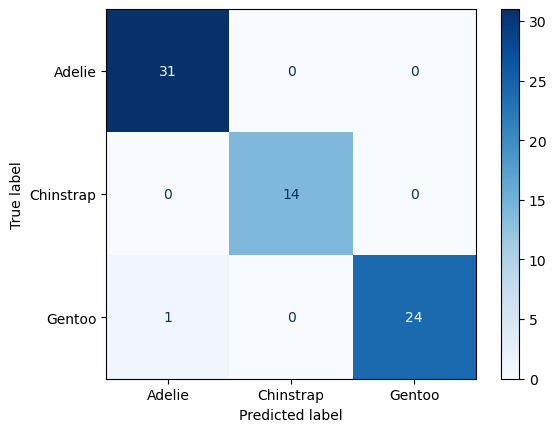

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('default')

y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)
y_test_label = np.argmax(y_test, axis=1)

labels = ["Adelie", "Chinstrap", "Gentoo"]

cm = confusion_matrix(y_test_label, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


disp.plot(cmap=plt.cm.Blues)
plt.savefig('../pics/Neural_net/confusion_matrix_1200_iteration')
plt.savefig('../pics/Neural_net/confusion_matrix_1200_iteration.pdf')
plt.show()

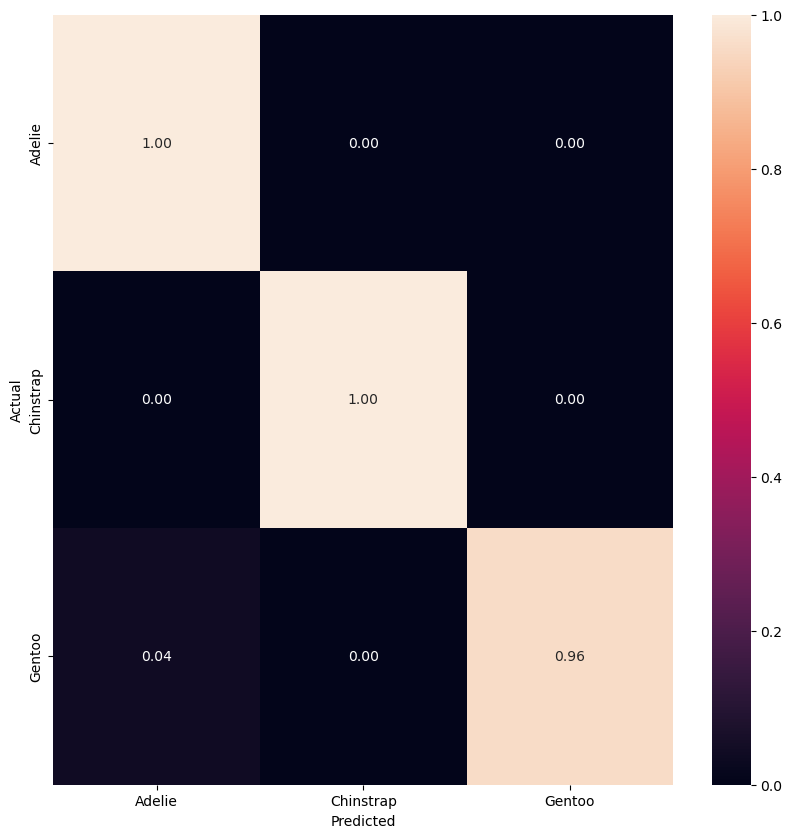

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_label, y_predict)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('../pics/Neural_net/confusion_matrix_normalization_1200_iteration')
plt.savefig('../pics/Neural_net/confusion_matrix_normalization_1200_iteration.pdf')
plt.show(block=False)

In [44]:
model = Sequential()

model.add(Dense(16, input_shape=(9,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, verbose=2, batch_size=16, epochs=1500)
results = model.evaluate(X_test, y_test)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 3)                 51        
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1500
17/17 - 0s - loss: 762.7091 - accuracy: 0.1985
Epoch 2/1500
17/17 - 0s - loss: 433.1714 - accuracy: 0.3493
Epoch 3/1500
17/17 - 0s - loss: 297.7758 - accuracy: 0.2316
Epoch 4/1500
17/17 - 0s - loss: 182.6355 - accuracy: 0.2463
Epoch 5/1500
17/17 - 0s - loss: 75.6075 - accuracy: 0.2022
Epoch 6/1500
17/17 - 0s - loss: 16.0251 - accuracy: 0.2904
Epoch 7/1500
17/17 - 0s

Epoch 127/1500
17/17 - 0s - loss: 0.4446 - accuracy: 0.7831
Epoch 128/1500
17/17 - 0s - loss: 0.2176 - accuracy: 0.9228
Epoch 129/1500
17/17 - 0s - loss: 0.2894 - accuracy: 0.8860
Epoch 130/1500
17/17 - 0s - loss: 0.2537 - accuracy: 0.9154
Epoch 131/1500
17/17 - 0s - loss: 0.2201 - accuracy: 0.9338
Epoch 132/1500
17/17 - 0s - loss: 0.3008 - accuracy: 0.8860
Epoch 133/1500
17/17 - 0s - loss: 0.3870 - accuracy: 0.8419
Epoch 134/1500
17/17 - 0s - loss: 0.5552 - accuracy: 0.7684
Epoch 135/1500
17/17 - 0s - loss: 0.6871 - accuracy: 0.7353
Epoch 136/1500
17/17 - 0s - loss: 0.3578 - accuracy: 0.8529
Epoch 137/1500
17/17 - 0s - loss: 0.3180 - accuracy: 0.8640
Epoch 138/1500
17/17 - 0s - loss: 0.3650 - accuracy: 0.8272
Epoch 139/1500
17/17 - 0s - loss: 0.2463 - accuracy: 0.8971
Epoch 140/1500
17/17 - 0s - loss: 0.3849 - accuracy: 0.8125
Epoch 141/1500
17/17 - 0s - loss: 0.2140 - accuracy: 0.9265
Epoch 142/1500
17/17 - 0s - loss: 0.2093 - accuracy: 0.9265
Epoch 143/1500
17/17 - 0s - loss: 0.2330

Epoch 264/1500
17/17 - 0s - loss: 0.1750 - accuracy: 0.9338
Epoch 265/1500
17/17 - 0s - loss: 0.1477 - accuracy: 0.9449
Epoch 266/1500
17/17 - 0s - loss: 0.1212 - accuracy: 0.9706
Epoch 267/1500
17/17 - 0s - loss: 0.1629 - accuracy: 0.9375
Epoch 268/1500
17/17 - 0s - loss: 0.1714 - accuracy: 0.9228
Epoch 269/1500
17/17 - 0s - loss: 0.2253 - accuracy: 0.9154
Epoch 270/1500
17/17 - 0s - loss: 0.3670 - accuracy: 0.8493
Epoch 271/1500
17/17 - 0s - loss: 0.5802 - accuracy: 0.7868
Epoch 272/1500
17/17 - 0s - loss: 0.4355 - accuracy: 0.8603
Epoch 273/1500
17/17 - 0s - loss: 0.3586 - accuracy: 0.8603
Epoch 274/1500
17/17 - 0s - loss: 0.3770 - accuracy: 0.8493
Epoch 275/1500
17/17 - 0s - loss: 0.2743 - accuracy: 0.8971
Epoch 276/1500
17/17 - 0s - loss: 0.1798 - accuracy: 0.9301
Epoch 277/1500
17/17 - 0s - loss: 0.4393 - accuracy: 0.8382
Epoch 278/1500
17/17 - 0s - loss: 0.4876 - accuracy: 0.8235
Epoch 279/1500
17/17 - 0s - loss: 0.6681 - accuracy: 0.7500
Epoch 280/1500
17/17 - 0s - loss: 0.7546

Epoch 401/1500
17/17 - 0s - loss: 0.4346 - accuracy: 0.8272
Epoch 402/1500
17/17 - 0s - loss: 0.1913 - accuracy: 0.9228
Epoch 403/1500
17/17 - 0s - loss: 0.1231 - accuracy: 0.9449
Epoch 404/1500
17/17 - 0s - loss: 0.2055 - accuracy: 0.9338
Epoch 405/1500
17/17 - 0s - loss: 0.1338 - accuracy: 0.9559
Epoch 406/1500
17/17 - 0s - loss: 0.1220 - accuracy: 0.9669
Epoch 407/1500
17/17 - 0s - loss: 0.0684 - accuracy: 0.9816
Epoch 408/1500
17/17 - 0s - loss: 0.0731 - accuracy: 0.9779
Epoch 409/1500
17/17 - 0s - loss: 0.3291 - accuracy: 0.8971
Epoch 410/1500
17/17 - 0s - loss: 0.9668 - accuracy: 0.8015
Epoch 411/1500
17/17 - 0s - loss: 0.4154 - accuracy: 0.8272
Epoch 412/1500
17/17 - 0s - loss: 0.2102 - accuracy: 0.9228
Epoch 413/1500
17/17 - 0s - loss: 0.0740 - accuracy: 0.9743
Epoch 414/1500
17/17 - 0s - loss: 0.0752 - accuracy: 0.9706
Epoch 415/1500
17/17 - 0s - loss: 0.0713 - accuracy: 0.9816
Epoch 416/1500
17/17 - 0s - loss: 0.0756 - accuracy: 0.9706
Epoch 417/1500
17/17 - 0s - loss: 0.2373

Epoch 538/1500
17/17 - 0s - loss: 0.0753 - accuracy: 0.9743
Epoch 539/1500
17/17 - 0s - loss: 0.0514 - accuracy: 0.9890
Epoch 540/1500
17/17 - 0s - loss: 0.0662 - accuracy: 0.9743
Epoch 541/1500
17/17 - 0s - loss: 0.1178 - accuracy: 0.9522
Epoch 542/1500
17/17 - 0s - loss: 0.1698 - accuracy: 0.9265
Epoch 543/1500
17/17 - 0s - loss: 0.0520 - accuracy: 0.9853
Epoch 544/1500
17/17 - 0s - loss: 0.0748 - accuracy: 0.9743
Epoch 545/1500
17/17 - 0s - loss: 0.0488 - accuracy: 0.9890
Epoch 546/1500
17/17 - 0s - loss: 0.0662 - accuracy: 0.9816
Epoch 547/1500
17/17 - 0s - loss: 0.0852 - accuracy: 0.9669
Epoch 548/1500
17/17 - 0s - loss: 0.0447 - accuracy: 0.9853
Epoch 549/1500
17/17 - 0s - loss: 0.0434 - accuracy: 0.9890
Epoch 550/1500
17/17 - 0s - loss: 0.0366 - accuracy: 0.9926
Epoch 551/1500
17/17 - 0s - loss: 0.0970 - accuracy: 0.9706
Epoch 552/1500
17/17 - 0s - loss: 0.1226 - accuracy: 0.9559
Epoch 553/1500
17/17 - 0s - loss: 0.3494 - accuracy: 0.8787
Epoch 554/1500
17/17 - 0s - loss: 0.3888

Epoch 675/1500
17/17 - 0s - loss: 0.1958 - accuracy: 0.9449
Epoch 676/1500
17/17 - 0s - loss: 0.0727 - accuracy: 0.9779
Epoch 677/1500
17/17 - 0s - loss: 0.0753 - accuracy: 0.9559
Epoch 678/1500
17/17 - 0s - loss: 0.0735 - accuracy: 0.9669
Epoch 679/1500
17/17 - 0s - loss: 0.0893 - accuracy: 0.9596
Epoch 680/1500
17/17 - 0s - loss: 0.0343 - accuracy: 0.9890
Epoch 681/1500
17/17 - 0s - loss: 0.0558 - accuracy: 0.9706
Epoch 682/1500
17/17 - 0s - loss: 0.0518 - accuracy: 0.9816
Epoch 683/1500
17/17 - 0s - loss: 0.2889 - accuracy: 0.9081
Epoch 684/1500
17/17 - 0s - loss: 0.1741 - accuracy: 0.9228
Epoch 685/1500
17/17 - 0s - loss: 0.1445 - accuracy: 0.9412
Epoch 686/1500
17/17 - 0s - loss: 0.0409 - accuracy: 0.9890
Epoch 687/1500
17/17 - 0s - loss: 0.0356 - accuracy: 0.9890
Epoch 688/1500
17/17 - 0s - loss: 0.0259 - accuracy: 0.9926
Epoch 689/1500
17/17 - 0s - loss: 0.0319 - accuracy: 0.9963
Epoch 690/1500
17/17 - 0s - loss: 0.1305 - accuracy: 0.9485
Epoch 691/1500
17/17 - 0s - loss: 0.1452

Epoch 812/1500
17/17 - 0s - loss: 0.1551 - accuracy: 0.9412
Epoch 813/1500
17/17 - 0s - loss: 0.0800 - accuracy: 0.9743
Epoch 814/1500
17/17 - 0s - loss: 0.0258 - accuracy: 0.9890
Epoch 815/1500
17/17 - 0s - loss: 0.1376 - accuracy: 0.9559
Epoch 816/1500
17/17 - 0s - loss: 0.0741 - accuracy: 0.9632
Epoch 817/1500
17/17 - 0s - loss: 0.1312 - accuracy: 0.9559
Epoch 818/1500
17/17 - 0s - loss: 0.1935 - accuracy: 0.9301
Epoch 819/1500
17/17 - 0s - loss: 0.0306 - accuracy: 0.9853
Epoch 820/1500
17/17 - 0s - loss: 0.2145 - accuracy: 0.9338
Epoch 821/1500
17/17 - 0s - loss: 0.5042 - accuracy: 0.8750
Epoch 822/1500
17/17 - 0s - loss: 0.2470 - accuracy: 0.9154
Epoch 823/1500
17/17 - 0s - loss: 0.2315 - accuracy: 0.9265
Epoch 824/1500
17/17 - 0s - loss: 0.0849 - accuracy: 0.9669
Epoch 825/1500
17/17 - 0s - loss: 0.0620 - accuracy: 0.9779
Epoch 826/1500
17/17 - 0s - loss: 0.0168 - accuracy: 0.9963
Epoch 827/1500
17/17 - 0s - loss: 0.0295 - accuracy: 0.9890
Epoch 828/1500
17/17 - 0s - loss: 0.0468

Epoch 949/1500
17/17 - 0s - loss: 0.0260 - accuracy: 0.9890
Epoch 950/1500
17/17 - 0s - loss: 0.0512 - accuracy: 0.9706
Epoch 951/1500
17/17 - 0s - loss: 0.0289 - accuracy: 0.9926
Epoch 952/1500
17/17 - 0s - loss: 0.0147 - accuracy: 0.9926
Epoch 953/1500
17/17 - 0s - loss: 0.0378 - accuracy: 0.9890
Epoch 954/1500
17/17 - 0s - loss: 0.0219 - accuracy: 0.9926
Epoch 955/1500
17/17 - 0s - loss: 0.0631 - accuracy: 0.9779
Epoch 956/1500
17/17 - 0s - loss: 0.0306 - accuracy: 0.9890
Epoch 957/1500
17/17 - 0s - loss: 0.0294 - accuracy: 0.9890
Epoch 958/1500
17/17 - 0s - loss: 0.0504 - accuracy: 0.9779
Epoch 959/1500
17/17 - 0s - loss: 0.0423 - accuracy: 0.9743
Epoch 960/1500
17/17 - 0s - loss: 0.0926 - accuracy: 0.9632
Epoch 961/1500
17/17 - 0s - loss: 0.0132 - accuracy: 0.9963
Epoch 962/1500
17/17 - 0s - loss: 0.0213 - accuracy: 0.9926
Epoch 963/1500
17/17 - 0s - loss: 0.0204 - accuracy: 0.9926
Epoch 964/1500
17/17 - 0s - loss: 0.0173 - accuracy: 0.9926
Epoch 965/1500
17/17 - 0s - loss: 0.0308

Epoch 1085/1500
17/17 - 0s - loss: 0.0368 - accuracy: 0.9926
Epoch 1086/1500
17/17 - 0s - loss: 0.1577 - accuracy: 0.9559
Epoch 1087/1500
17/17 - 0s - loss: 0.0600 - accuracy: 0.9743
Epoch 1088/1500
17/17 - 0s - loss: 0.0233 - accuracy: 0.9853
Epoch 1089/1500
17/17 - 0s - loss: 0.0487 - accuracy: 0.9816
Epoch 1090/1500
17/17 - 0s - loss: 0.0553 - accuracy: 0.9816
Epoch 1091/1500
17/17 - 0s - loss: 0.1061 - accuracy: 0.9522
Epoch 1092/1500
17/17 - 0s - loss: 0.0293 - accuracy: 0.9926
Epoch 1093/1500
17/17 - 0s - loss: 0.0469 - accuracy: 0.9743
Epoch 1094/1500
17/17 - 0s - loss: 0.1373 - accuracy: 0.9559
Epoch 1095/1500
17/17 - 0s - loss: 0.1126 - accuracy: 0.9559
Epoch 1096/1500
17/17 - 0s - loss: 0.0355 - accuracy: 0.9853
Epoch 1097/1500
17/17 - 0s - loss: 0.0346 - accuracy: 0.9963
Epoch 1098/1500
17/17 - 0s - loss: 0.0420 - accuracy: 0.9853
Epoch 1099/1500
17/17 - 0s - loss: 0.0248 - accuracy: 0.9890
Epoch 1100/1500
17/17 - 0s - loss: 0.0122 - accuracy: 0.9926
Epoch 1101/1500
17/17 - 

Epoch 1220/1500
17/17 - 0s - loss: 0.0128 - accuracy: 1.0000
Epoch 1221/1500
17/17 - 0s - loss: 0.0222 - accuracy: 0.9926
Epoch 1222/1500
17/17 - 0s - loss: 0.1193 - accuracy: 0.9596
Epoch 1223/1500
17/17 - 0s - loss: 0.2009 - accuracy: 0.9412
Epoch 1224/1500
17/17 - 0s - loss: 0.2370 - accuracy: 0.9154
Epoch 1225/1500
17/17 - 0s - loss: 0.5390 - accuracy: 0.8566
Epoch 1226/1500
17/17 - 0s - loss: 0.0919 - accuracy: 0.9669
Epoch 1227/1500
17/17 - 0s - loss: 0.0200 - accuracy: 0.9963
Epoch 1228/1500
17/17 - 0s - loss: 0.0102 - accuracy: 1.0000
Epoch 1229/1500
17/17 - 0s - loss: 0.0138 - accuracy: 1.0000
Epoch 1230/1500
17/17 - 0s - loss: 0.0109 - accuracy: 1.0000
Epoch 1231/1500
17/17 - 0s - loss: 0.0169 - accuracy: 1.0000
Epoch 1232/1500
17/17 - 0s - loss: 0.0296 - accuracy: 0.9926
Epoch 1233/1500
17/17 - 0s - loss: 0.0414 - accuracy: 0.9853
Epoch 1234/1500
17/17 - 0s - loss: 0.0464 - accuracy: 0.9816
Epoch 1235/1500
17/17 - 0s - loss: 0.0193 - accuracy: 0.9926
Epoch 1236/1500
17/17 - 

Epoch 1355/1500
17/17 - 0s - loss: 0.0159 - accuracy: 0.9963
Epoch 1356/1500
17/17 - 0s - loss: 0.0160 - accuracy: 0.9963
Epoch 1357/1500
17/17 - 0s - loss: 0.0249 - accuracy: 0.9963
Epoch 1358/1500
17/17 - 0s - loss: 0.0253 - accuracy: 0.9890
Epoch 1359/1500
17/17 - 0s - loss: 0.0233 - accuracy: 0.9926
Epoch 1360/1500
17/17 - 0s - loss: 0.1153 - accuracy: 0.9485
Epoch 1361/1500
17/17 - 0s - loss: 0.7648 - accuracy: 0.8162
Epoch 1362/1500
17/17 - 0s - loss: 1.7088 - accuracy: 0.7132
Epoch 1363/1500
17/17 - 0s - loss: 0.6457 - accuracy: 0.8125
Epoch 1364/1500
17/17 - 0s - loss: 0.1063 - accuracy: 0.9596
Epoch 1365/1500
17/17 - 0s - loss: 0.0258 - accuracy: 0.9926
Epoch 1366/1500
17/17 - 0s - loss: 0.0152 - accuracy: 1.0000
Epoch 1367/1500
17/17 - 0s - loss: 0.0482 - accuracy: 0.9779
Epoch 1368/1500
17/17 - 0s - loss: 0.0347 - accuracy: 0.9890
Epoch 1369/1500
17/17 - 0s - loss: 0.0190 - accuracy: 0.9963
Epoch 1370/1500
17/17 - 0s - loss: 0.0349 - accuracy: 0.9926
Epoch 1371/1500
17/17 - 

Epoch 1490/1500
17/17 - 0s - loss: 0.1629 - accuracy: 0.9265
Epoch 1491/1500
17/17 - 0s - loss: 0.0766 - accuracy: 0.9706
Epoch 1492/1500
17/17 - 0s - loss: 0.3490 - accuracy: 0.9044
Epoch 1493/1500
17/17 - 0s - loss: 0.4611 - accuracy: 0.8750
Epoch 1494/1500
17/17 - 0s - loss: 0.0092 - accuracy: 1.0000
Epoch 1495/1500
17/17 - 0s - loss: 0.0141 - accuracy: 0.9963
Epoch 1496/1500
17/17 - 0s - loss: 0.0202 - accuracy: 0.9963
Epoch 1497/1500
17/17 - 0s - loss: 0.0209 - accuracy: 0.9890
Epoch 1498/1500
17/17 - 0s - loss: 0.0121 - accuracy: 1.0000
Epoch 1499/1500
17/17 - 0s - loss: 0.0111 - accuracy: 0.9963
Epoch 1500/1500
17/17 - 0s - loss: 0.0209 - accuracy: 0.9890
3/3 [==============================] - 0s 499us/step - loss: 0.1305 - accuracy: 0.9286


In [45]:
model = Sequential()

model.add(Dense(16, input_shape=(9,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, verbose=2, batch_size=16, epochs=1800)
results = model.evaluate(X_test, y_test)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                160       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 3)                 51        
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1800
17/17 - 0s - loss: 148.2809 - accuracy: 0.2941
Epoch 2/1800
17/17 - 0s - loss: 37.3042 - accuracy: 0.3603
Epoch 3/1800
17/17 - 0s - loss: 17.3525 - accuracy: 0.4632
Epoch 4/1800
17/17 - 0s - loss: 5.3830 - accuracy: 0.3934
Epoch 5/1800
17/17 - 0s - loss: 2.7717 - accuracy: 0.4081
Epoch 6/1800
17/17 - 0s - loss: 3.1500 - accuracy: 0.3493
Epoch 7/1800
17/17 - 0s - los

Epoch 127/1800
17/17 - 0s - loss: 0.9532 - accuracy: 0.6471
Epoch 128/1800
17/17 - 0s - loss: 2.4408 - accuracy: 0.5772
Epoch 129/1800
17/17 - 0s - loss: 2.8886 - accuracy: 0.5441
Epoch 130/1800
17/17 - 0s - loss: 1.8540 - accuracy: 0.5956
Epoch 131/1800
17/17 - 0s - loss: 1.2174 - accuracy: 0.6140
Epoch 132/1800
17/17 - 0s - loss: 1.3536 - accuracy: 0.6471
Epoch 133/1800
17/17 - 0s - loss: 4.2605 - accuracy: 0.4596
Epoch 134/1800
17/17 - 0s - loss: 2.2692 - accuracy: 0.5478
Epoch 135/1800
17/17 - 0s - loss: 0.9468 - accuracy: 0.6838
Epoch 136/1800
17/17 - 0s - loss: 1.4020 - accuracy: 0.6691
Epoch 137/1800
17/17 - 0s - loss: 3.9576 - accuracy: 0.5257
Epoch 138/1800
17/17 - 0s - loss: 1.8250 - accuracy: 0.5809
Epoch 139/1800
17/17 - 0s - loss: 2.1593 - accuracy: 0.6140
Epoch 140/1800
17/17 - 0s - loss: 0.8759 - accuracy: 0.6949
Epoch 141/1800
17/17 - 0s - loss: 1.1063 - accuracy: 0.6360
Epoch 142/1800
17/17 - 0s - loss: 1.2550 - accuracy: 0.6287
Epoch 143/1800
17/17 - 0s - loss: 0.8936

Epoch 264/1800
17/17 - 0s - loss: 0.5221 - accuracy: 0.7978
Epoch 265/1800
17/17 - 0s - loss: 0.9209 - accuracy: 0.7684
Epoch 266/1800
17/17 - 0s - loss: 0.8422 - accuracy: 0.7316
Epoch 267/1800
17/17 - 0s - loss: 1.0936 - accuracy: 0.6912
Epoch 268/1800
17/17 - 0s - loss: 1.3050 - accuracy: 0.6949
Epoch 269/1800
17/17 - 0s - loss: 0.5660 - accuracy: 0.7978
Epoch 270/1800
17/17 - 0s - loss: 0.5778 - accuracy: 0.7868
Epoch 271/1800
17/17 - 0s - loss: 0.3229 - accuracy: 0.8750
Epoch 272/1800
17/17 - 0s - loss: 0.3230 - accuracy: 0.8934
Epoch 273/1800
17/17 - 0s - loss: 0.4363 - accuracy: 0.8051
Epoch 274/1800
17/17 - 0s - loss: 0.6274 - accuracy: 0.7794
Epoch 275/1800
17/17 - 0s - loss: 0.4059 - accuracy: 0.8309
Epoch 276/1800
17/17 - 0s - loss: 0.2729 - accuracy: 0.9154
Epoch 277/1800
17/17 - 0s - loss: 0.7889 - accuracy: 0.7426
Epoch 278/1800
17/17 - 0s - loss: 1.7350 - accuracy: 0.6471
Epoch 279/1800
17/17 - 0s - loss: 1.1633 - accuracy: 0.6728
Epoch 280/1800
17/17 - 0s - loss: 0.7653

Epoch 401/1800
17/17 - 0s - loss: 0.3401 - accuracy: 0.8860
Epoch 402/1800
17/17 - 0s - loss: 0.2354 - accuracy: 0.9228
Epoch 403/1800
17/17 - 0s - loss: 0.1223 - accuracy: 0.9632
Epoch 404/1800
17/17 - 0s - loss: 0.1334 - accuracy: 0.9522
Epoch 405/1800
17/17 - 0s - loss: 0.1452 - accuracy: 0.9559
Epoch 406/1800
17/17 - 0s - loss: 0.5456 - accuracy: 0.8640
Epoch 407/1800
17/17 - 0s - loss: 1.6229 - accuracy: 0.6507
Epoch 408/1800
17/17 - 0s - loss: 0.4678 - accuracy: 0.8419
Epoch 409/1800
17/17 - 0s - loss: 0.2284 - accuracy: 0.8897
Epoch 410/1800
17/17 - 0s - loss: 0.7608 - accuracy: 0.7941
Epoch 411/1800
17/17 - 0s - loss: 0.2218 - accuracy: 0.9081
Epoch 412/1800
17/17 - 0s - loss: 0.2343 - accuracy: 0.9081
Epoch 413/1800
17/17 - 0s - loss: 0.1824 - accuracy: 0.9338
Epoch 414/1800
17/17 - 0s - loss: 0.1293 - accuracy: 0.9522
Epoch 415/1800
17/17 - 0s - loss: 0.2108 - accuracy: 0.9044
Epoch 416/1800
17/17 - 0s - loss: 0.3362 - accuracy: 0.8824
Epoch 417/1800
17/17 - 0s - loss: 0.3981

Epoch 538/1800
17/17 - 0s - loss: 0.5937 - accuracy: 0.8309
Epoch 539/1800
17/17 - 0s - loss: 0.1350 - accuracy: 0.9559
Epoch 540/1800
17/17 - 0s - loss: 0.1160 - accuracy: 0.9596
Epoch 541/1800
17/17 - 0s - loss: 0.1349 - accuracy: 0.9338
Epoch 542/1800
17/17 - 0s - loss: 0.2866 - accuracy: 0.8676
Epoch 543/1800
17/17 - 0s - loss: 0.4123 - accuracy: 0.8199
Epoch 544/1800
17/17 - 0s - loss: 0.2788 - accuracy: 0.9007
Epoch 545/1800
17/17 - 0s - loss: 0.0862 - accuracy: 0.9743
Epoch 546/1800
17/17 - 0s - loss: 0.2457 - accuracy: 0.9081
Epoch 547/1800
17/17 - 0s - loss: 0.8347 - accuracy: 0.7721
Epoch 548/1800
17/17 - 0s - loss: 0.3106 - accuracy: 0.8603
Epoch 549/1800
17/17 - 0s - loss: 0.7721 - accuracy: 0.7904
Epoch 550/1800
17/17 - 0s - loss: 0.4397 - accuracy: 0.8640
Epoch 551/1800
17/17 - 0s - loss: 0.4759 - accuracy: 0.8713
Epoch 552/1800
17/17 - 0s - loss: 0.1092 - accuracy: 0.9669
Epoch 553/1800
17/17 - 0s - loss: 0.1393 - accuracy: 0.9485
Epoch 554/1800
17/17 - 0s - loss: 0.1266

Epoch 675/1800
17/17 - 0s - loss: 0.3720 - accuracy: 0.8824
Epoch 676/1800
17/17 - 0s - loss: 0.2513 - accuracy: 0.9044
Epoch 677/1800
17/17 - 0s - loss: 1.2468 - accuracy: 0.7316
Epoch 678/1800
17/17 - 0s - loss: 1.1215 - accuracy: 0.7353
Epoch 679/1800
17/17 - 0s - loss: 0.7582 - accuracy: 0.8162
Epoch 680/1800
17/17 - 0s - loss: 0.3598 - accuracy: 0.8934
Epoch 681/1800
17/17 - 0s - loss: 0.2712 - accuracy: 0.9191
Epoch 682/1800
17/17 - 0s - loss: 0.4242 - accuracy: 0.8713
Epoch 683/1800
17/17 - 0s - loss: 0.1962 - accuracy: 0.9191
Epoch 684/1800
17/17 - 0s - loss: 0.1055 - accuracy: 0.9559
Epoch 685/1800
17/17 - 0s - loss: 0.3225 - accuracy: 0.8787
Epoch 686/1800
17/17 - 0s - loss: 2.1140 - accuracy: 0.7316
Epoch 687/1800
17/17 - 0s - loss: 3.6488 - accuracy: 0.5772
Epoch 688/1800
17/17 - 0s - loss: 1.5077 - accuracy: 0.7059
Epoch 689/1800
17/17 - 0s - loss: 1.1437 - accuracy: 0.7757
Epoch 690/1800
17/17 - 0s - loss: 0.4413 - accuracy: 0.8529
Epoch 691/1800
17/17 - 0s - loss: 0.2583

Epoch 812/1800
17/17 - 0s - loss: 0.2241 - accuracy: 0.9081
Epoch 813/1800
17/17 - 0s - loss: 0.1723 - accuracy: 0.9485
Epoch 814/1800
17/17 - 0s - loss: 0.0353 - accuracy: 0.9853
Epoch 815/1800
17/17 - 0s - loss: 0.0307 - accuracy: 0.9853
Epoch 816/1800
17/17 - 0s - loss: 0.0365 - accuracy: 0.9853
Epoch 817/1800
17/17 - 0s - loss: 0.0983 - accuracy: 0.9596
Epoch 818/1800
17/17 - 0s - loss: 0.1224 - accuracy: 0.9632
Epoch 819/1800
17/17 - 0s - loss: 0.6753 - accuracy: 0.8088
Epoch 820/1800
17/17 - 0s - loss: 0.2433 - accuracy: 0.9154
Epoch 821/1800
17/17 - 0s - loss: 0.4229 - accuracy: 0.8419
Epoch 822/1800
17/17 - 0s - loss: 0.4232 - accuracy: 0.8824
Epoch 823/1800
17/17 - 0s - loss: 0.4772 - accuracy: 0.8676
Epoch 824/1800
17/17 - 0s - loss: 0.1959 - accuracy: 0.9191
Epoch 825/1800
17/17 - 0s - loss: 0.0587 - accuracy: 0.9743
Epoch 826/1800
17/17 - 0s - loss: 0.0395 - accuracy: 0.9853
Epoch 827/1800
17/17 - 0s - loss: 0.0366 - accuracy: 0.9853
Epoch 828/1800
17/17 - 0s - loss: 0.0359

Epoch 949/1800
17/17 - 0s - loss: 0.0841 - accuracy: 0.9669
Epoch 950/1800
17/17 - 0s - loss: 0.0664 - accuracy: 0.9669
Epoch 951/1800
17/17 - 0s - loss: 0.0491 - accuracy: 0.9743
Epoch 952/1800
17/17 - 0s - loss: 0.0723 - accuracy: 0.9816
Epoch 953/1800
17/17 - 0s - loss: 0.0323 - accuracy: 0.9816
Epoch 954/1800
17/17 - 0s - loss: 0.0384 - accuracy: 0.9890
Epoch 955/1800
17/17 - 0s - loss: 0.0916 - accuracy: 0.9669
Epoch 956/1800
17/17 - 0s - loss: 0.1736 - accuracy: 0.9522
Epoch 957/1800
17/17 - 0s - loss: 0.2836 - accuracy: 0.9228
Epoch 958/1800
17/17 - 0s - loss: 0.1381 - accuracy: 0.9375
Epoch 959/1800
17/17 - 0s - loss: 0.1154 - accuracy: 0.9559
Epoch 960/1800
17/17 - 0s - loss: 0.0589 - accuracy: 0.9779
Epoch 961/1800
17/17 - 0s - loss: 0.0205 - accuracy: 0.9963
Epoch 962/1800
17/17 - 0s - loss: 0.0297 - accuracy: 0.9963
Epoch 963/1800
17/17 - 0s - loss: 0.0768 - accuracy: 0.9706
Epoch 964/1800
17/17 - 0s - loss: 0.0895 - accuracy: 0.9669
Epoch 965/1800
17/17 - 0s - loss: 0.0693

Epoch 1085/1800
17/17 - 0s - loss: 0.0095 - accuracy: 1.0000
Epoch 1086/1800
17/17 - 0s - loss: 0.0167 - accuracy: 0.9963
Epoch 1087/1800
17/17 - 0s - loss: 0.0177 - accuracy: 0.9926
Epoch 1088/1800
17/17 - 0s - loss: 0.0632 - accuracy: 0.9706
Epoch 1089/1800
17/17 - 0s - loss: 0.0446 - accuracy: 0.9779
Epoch 1090/1800
17/17 - 0s - loss: 0.0336 - accuracy: 0.9890
Epoch 1091/1800
17/17 - 0s - loss: 0.0160 - accuracy: 0.9963
Epoch 1092/1800
17/17 - 0s - loss: 0.0151 - accuracy: 0.9963
Epoch 1093/1800
17/17 - 0s - loss: 0.0526 - accuracy: 0.9706
Epoch 1094/1800
17/17 - 0s - loss: 0.0811 - accuracy: 0.9596
Epoch 1095/1800
17/17 - 0s - loss: 0.0424 - accuracy: 0.9816
Epoch 1096/1800
17/17 - 0s - loss: 0.0235 - accuracy: 0.9926
Epoch 1097/1800
17/17 - 0s - loss: 0.0596 - accuracy: 0.9743
Epoch 1098/1800
17/17 - 0s - loss: 0.0812 - accuracy: 0.9669
Epoch 1099/1800
17/17 - 0s - loss: 0.0615 - accuracy: 0.9779
Epoch 1100/1800
17/17 - 0s - loss: 0.5150 - accuracy: 0.8676
Epoch 1101/1800
17/17 - 

Epoch 1220/1800
17/17 - 0s - loss: 0.0525 - accuracy: 0.9853
Epoch 1221/1800
17/17 - 0s - loss: 0.0100 - accuracy: 0.9963
Epoch 1222/1800
17/17 - 0s - loss: 0.0412 - accuracy: 0.9890
Epoch 1223/1800
17/17 - 0s - loss: 0.0703 - accuracy: 0.9779
Epoch 1224/1800
17/17 - 0s - loss: 0.0413 - accuracy: 0.9779
Epoch 1225/1800
17/17 - 0s - loss: 0.0263 - accuracy: 0.9890
Epoch 1226/1800
17/17 - 0s - loss: 0.0151 - accuracy: 0.9963
Epoch 1227/1800
17/17 - 0s - loss: 0.0122 - accuracy: 0.9963
Epoch 1228/1800
17/17 - 0s - loss: 0.0134 - accuracy: 1.0000
Epoch 1229/1800
17/17 - 0s - loss: 0.0285 - accuracy: 0.9926
Epoch 1230/1800
17/17 - 0s - loss: 0.0600 - accuracy: 0.9779
Epoch 1231/1800
17/17 - 0s - loss: 0.1986 - accuracy: 0.9338
Epoch 1232/1800
17/17 - 0s - loss: 1.5573 - accuracy: 0.7941
Epoch 1233/1800
17/17 - 0s - loss: 0.4918 - accuracy: 0.8897
Epoch 1234/1800
17/17 - 0s - loss: 0.1306 - accuracy: 0.9449
Epoch 1235/1800
17/17 - 0s - loss: 0.2962 - accuracy: 0.8934
Epoch 1236/1800
17/17 - 

Epoch 1355/1800
17/17 - 0s - loss: 1.4270 - accuracy: 0.8088
Epoch 1356/1800
17/17 - 0s - loss: 0.4571 - accuracy: 0.8860
Epoch 1357/1800
17/17 - 0s - loss: 0.2369 - accuracy: 0.9228
Epoch 1358/1800
17/17 - 0s - loss: 0.4121 - accuracy: 0.9301
Epoch 1359/1800
17/17 - 0s - loss: 0.1251 - accuracy: 0.9743
Epoch 1360/1800
17/17 - 0s - loss: 0.0951 - accuracy: 0.9669
Epoch 1361/1800
17/17 - 0s - loss: 0.0313 - accuracy: 0.9853
Epoch 1362/1800
17/17 - 0s - loss: 0.0950 - accuracy: 0.9706
Epoch 1363/1800
17/17 - 0s - loss: 0.0920 - accuracy: 0.9522
Epoch 1364/1800
17/17 - 0s - loss: 0.0496 - accuracy: 0.9779
Epoch 1365/1800
17/17 - 0s - loss: 0.0865 - accuracy: 0.9596
Epoch 1366/1800
17/17 - 0s - loss: 0.0784 - accuracy: 0.9779
Epoch 1367/1800
17/17 - 0s - loss: 0.0291 - accuracy: 0.9816
Epoch 1368/1800
17/17 - 0s - loss: 0.0117 - accuracy: 0.9963
Epoch 1369/1800
17/17 - 0s - loss: 0.0465 - accuracy: 0.9816
Epoch 1370/1800
17/17 - 0s - loss: 0.0476 - accuracy: 0.9890
Epoch 1371/1800
17/17 - 

Epoch 1490/1800
17/17 - 0s - loss: 0.0228 - accuracy: 0.9926
Epoch 1491/1800
17/17 - 0s - loss: 0.0189 - accuracy: 0.9926
Epoch 1492/1800
17/17 - 0s - loss: 0.0708 - accuracy: 0.9743
Epoch 1493/1800
17/17 - 0s - loss: 0.0121 - accuracy: 0.9926
Epoch 1494/1800
17/17 - 0s - loss: 0.0444 - accuracy: 0.9779
Epoch 1495/1800
17/17 - 0s - loss: 0.0780 - accuracy: 0.9779
Epoch 1496/1800
17/17 - 0s - loss: 0.7072 - accuracy: 0.8860
Epoch 1497/1800
17/17 - 0s - loss: 1.3800 - accuracy: 0.7647
Epoch 1498/1800
17/17 - 0s - loss: 0.3702 - accuracy: 0.9081
Epoch 1499/1800
17/17 - 0s - loss: 0.2649 - accuracy: 0.9375
Epoch 1500/1800
17/17 - 0s - loss: 0.2509 - accuracy: 0.9412
Epoch 1501/1800
17/17 - 0s - loss: 0.5184 - accuracy: 0.8750
Epoch 1502/1800
17/17 - 0s - loss: 1.1208 - accuracy: 0.8199
Epoch 1503/1800
17/17 - 0s - loss: 0.2181 - accuracy: 0.9375
Epoch 1504/1800
17/17 - 0s - loss: 0.0903 - accuracy: 0.9743
Epoch 1505/1800
17/17 - 0s - loss: 0.1215 - accuracy: 0.9669
Epoch 1506/1800
17/17 - 

Epoch 1625/1800
17/17 - 0s - loss: 0.0933 - accuracy: 0.9669
Epoch 1626/1800
17/17 - 0s - loss: 0.0862 - accuracy: 0.9706
Epoch 1627/1800
17/17 - 0s - loss: 1.4743 - accuracy: 0.7978
Epoch 1628/1800
17/17 - 0s - loss: 0.8696 - accuracy: 0.8676
Epoch 1629/1800
17/17 - 0s - loss: 0.1723 - accuracy: 0.9449
Epoch 1630/1800
17/17 - 0s - loss: 0.0653 - accuracy: 0.9779
Epoch 1631/1800
17/17 - 0s - loss: 0.2472 - accuracy: 0.9228
Epoch 1632/1800
17/17 - 0s - loss: 0.5777 - accuracy: 0.9007
Epoch 1633/1800
17/17 - 0s - loss: 0.0933 - accuracy: 0.9632
Epoch 1634/1800
17/17 - 0s - loss: 0.0739 - accuracy: 0.9632
Epoch 1635/1800
17/17 - 0s - loss: 0.0093 - accuracy: 0.9963
Epoch 1636/1800
17/17 - 0s - loss: 0.0097 - accuracy: 0.9963
Epoch 1637/1800
17/17 - 0s - loss: 0.0237 - accuracy: 0.9890
Epoch 1638/1800
17/17 - 0s - loss: 0.0466 - accuracy: 0.9816
Epoch 1639/1800
17/17 - 0s - loss: 0.0385 - accuracy: 0.9926
Epoch 1640/1800
17/17 - 0s - loss: 0.0572 - accuracy: 0.9816
Epoch 1641/1800
17/17 - 

Epoch 1760/1800
17/17 - 0s - loss: 0.0271 - accuracy: 0.9890
Epoch 1761/1800
17/17 - 0s - loss: 0.0264 - accuracy: 0.9853
Epoch 1762/1800
17/17 - 0s - loss: 0.0176 - accuracy: 0.9890
Epoch 1763/1800
17/17 - 0s - loss: 0.0458 - accuracy: 0.9853
Epoch 1764/1800
17/17 - 0s - loss: 0.0259 - accuracy: 0.9853
Epoch 1765/1800
17/17 - 0s - loss: 0.5633 - accuracy: 0.9081
Epoch 1766/1800
17/17 - 0s - loss: 0.2081 - accuracy: 0.9485
Epoch 1767/1800
17/17 - 0s - loss: 0.0915 - accuracy: 0.9779
Epoch 1768/1800
17/17 - 0s - loss: 0.0140 - accuracy: 0.9963
Epoch 1769/1800
17/17 - 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 1770/1800
17/17 - 0s - loss: 0.0195 - accuracy: 0.9926
Epoch 1771/1800
17/17 - 0s - loss: 0.0382 - accuracy: 0.9890
Epoch 1772/1800
17/17 - 0s - loss: 0.1125 - accuracy: 0.9596
Epoch 1773/1800
17/17 - 0s - loss: 0.0479 - accuracy: 0.9853
Epoch 1774/1800
17/17 - 0s - loss: 0.0197 - accuracy: 0.9926
Epoch 1775/1800
17/17 - 0s - loss: 0.2802 - accuracy: 0.9485
Epoch 1776/1800
17/17 - 